# Summary of lecture 1

Yesterday I introduced the language Julia, a language that is compiled Just in Time: the first time you run a function, it determines the types of the arguments and compiles it, so the next time is faster.
This has a list of advantages:
1. it is easy to type generic code
2. the user does not need to specify the types as he writes the code, making it easier and faster to reuse code
3. the second execution of a function is really fast

This puts together the advantages of interpreted languages, as Python and Matlab, with the speed of compiled languages as C++ and Fortran.

Summarizing: Julia is faster than Matlab and Python and simpler to program than C++ and Fortran.




We used Julia to implement some non-rigorous numerical experiments in Ergodic Theory. While this experiments may be used to gather evidence of some underlying mathematical phenomenon, they are not mathematical proofs.
The objective of our course is to develop tools that allow us to prove, with the assistance of a computer, Theorems in Computational Ergodic Theory.

To do so, we need to introduce some new tools, both practical and theoretical.

Today we will introduce Interval Arithmetics, a numerical concept that allows a computer to compute rigorous enclosures numerical expressions, i.e., intervals that are guaranteed to contain the __TRUE__ mathematical result of a function evaluation.

# Introducing Interval Arithmetic

In this notebook I will introduce one of the main tools of validated numerics: interval arithmetics.
We will install a ready made package, the IntervalArithmetic.jl package, a package in the shared Julia repository.

In [1]:
import Pkg;
Pkg.add("IntervalArithmetic")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [2]:
using IntervalArithmetic

The main idea behind IntervalArithmetic is the following, given a function $f$, Interval Arithmetics allows us to define a function $F$, called the __interval extension__ of $f$, such that for any set $I$ it returns an interval $F(I)$ such that
$$
f(I)\subset F(I).
$$
In other words, Interval arithmetics allows the computer to compute numerically an interval that contains the true mathematical result of the function. 
This is called the __range enclosure__ property.

A reference on the topic is the following book by [W. Tucker - Validated Numerics - A Short Introduction to Rigorous computation](https://www.amazon.de/-/en/Warwick-Tucker/dp/0691147817)

The simplest object of Interval Arithmetics are the intervals.
The macro @interval defines $x$ as the smallest interval that contains the real point $0.1$.

Remark that $0.1$ has infinite binary expansion, so it is not possible to represent it exactly in binary format, so this is a wide interval, with a lower bound different from the upper bound; the upper and lower bounds are the smallest representable number in Floating Point Arithmetic bigger than $0.1$ and the greatest representable number smaller than $x$

In [11]:
@format standard

Display parameters:
- format: standard
- decorations: false
- significant figures: 6

In [3]:
x = @interval 0.1 

[0.0999999, 0.100001]

In [6]:
bitstring(x.lo)

"0011111110111001100110011001100110011001100110011001100110011001"

In [7]:
bitstring(x.hi)

"0011111110111001100110011001100110011001100110011001100110011010"

I will change the output format of the intervals, to a midpoint radius format.

In [13]:
@format midpoint

Display parameters:
- format: midpoint
- decorations: false
- significant figures: 6

In [14]:
x

0.1 ± 1.38778e-17

In [15]:
@format standard

Display parameters:
- format: standard
- decorations: false
- significant figures: 6

In [8]:
y = @interval 0.3

[0.299999, 0.300001]

The operations in interval arithmetic are defined so that the sum of two intervals is an interval that contains the sum of all possible intervals (in some sense, this is similar to absolute error estimate as in the statistics of physical experiments).

In [9]:
x+y

[0.399999, 0.400001]

The same works with multiplication.

In [10]:
x*y

[0.0299999, 0.0300001]

Please note that wide intervals may be defined.

In [11]:
x = @interval -1 1

[-1, 1]

In [12]:
x+y

[-0.700001, 1.30001]

When an interval contains $0$, the real extended line formalism is used.
This is called the affine line extension in Tucker's book.

In [21]:
y/x

[-∞, ∞]

Summarizing: Interval arithmetics computes intervals of confidence. 

__The result of an operation done with interval arithmetics is guaranteed to contain the true mathematical result of the operation; this allows us to prove theorems with the assistance of a computer.__

## Function evaluation

Library routines are defined so that the __range enclosure__ property is satisfied. This allows us to get rigorous numerical results on mathematical functions.

In [13]:
f(x) = x*sin(1/x)

f (generic function with 1 method)

In [14]:
x = @interval 0 0.1

[0, 0.100001]

In [15]:
f(x)

[-0.100001, 0.100001]

In [16]:
using Plots

In [17]:
N = 16
X1 = [@interval i/N (i+1)/N for i in 0:N-1]

16-element Vector{Interval{Float64}}:
 [0, 0.0625]
    [0.0625, 0.125]
    [0.125, 0.1875]
    [0.1875, 0.25]
    [0.25, 0.3125]
    [0.3125, 0.375]
    [0.375, 0.4375]
    [0.4375, 0.5]
    [0.5, 0.5625]
    [0.5625, 0.625]
    [0.625, 0.6875]
    [0.6875, 0.75]
    [0.75, 0.8125]
    [0.8125, 0.875]
    [0.875, 0.9375]
    [0.9375, 1]

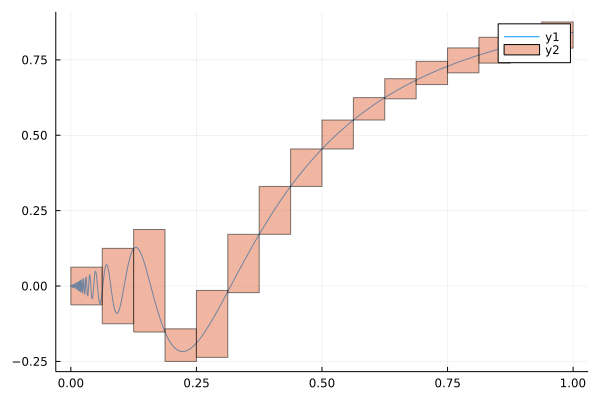

In [18]:
plot(f, 0, 1)
plot!(IntervalBox.(X1, f.(X1)))

It is important to observe, in the plot above, that while the graph of the function is computed nonrigorously, and therefore it is not validate, the interval computation is validated, so the rectangles in pink have the strength of theorems.

In [19]:
N = 128
X2 = [@interval i/N (i+1)/N for i in 0:N-1]

128-element Vector{Interval{Float64}}:
 [0, 0.0078125]
    [0.0078125, 0.015625]
    [0.015625, 0.0234375]
    [0.0234375, 0.03125]
    [0.03125, 0.0390625]
    [0.0390625, 0.046875]
    [0.046875, 0.0546875]
    [0.0546875, 0.0625]
    [0.0625, 0.0703125]
    [0.0703125, 0.078125]
    [0.078125, 0.0859375]
    [0.0859375, 0.09375]
    [0.09375, 0.101563]
     ⋮
    [0.90625, 0.914063]
    [0.914062, 0.921875]
    [0.921875, 0.929688]
    [0.929687, 0.9375]
    [0.9375, 0.945313]
    [0.945312, 0.953125]
    [0.953125, 0.960938]
    [0.960937, 0.96875]
    [0.96875, 0.976563]
    [0.976562, 0.984375]
    [0.984375, 0.992188]
    [0.992187, 1]

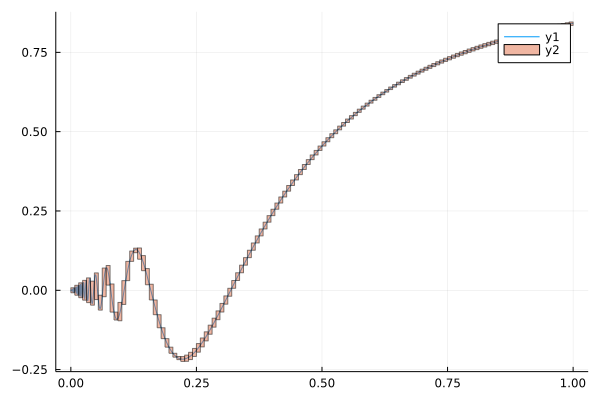

In [20]:
plot(f, 0, 1)
plot!(IntervalBox.(X2, f.(X2)))

The important thing to stress is that the evaluation of a function on a correctly defined interval has the strength of a mathematical theorem, i.e.,

In [21]:
f(@interval 0.5 0.7)

[0.454648, 0.700001]

can be read, in other words as, for any $x$ in $[0.5, 0.7]$ we have that $0.454648\leq f(x)\leq 0.700001$.

Please remark that this is a totally different scenario from numerical computations, where usually the statements are something as: if the algorithm is stable we get a result which is near the real result (called forward error bound) or if the algorithm is stable it solves a problem which is near our original problem (called backward error bound).

__Exercise__ Evaluate the function $sin(x)$ on the intervals $[0, 0.125]$, $[0, 0.25]$, $[0, 0.5]$, $[0, \pi]$, $[0, 3\pi]$.
Remember that you can type \pi+TAB to write the character $\pi$.

In [22]:
sin(@interval 0 2*π)

[-1, 1]

## How to use this

Due to the range enclosure property we can use this, as an example, to exclude intervals that surely __not contain__ zero. There may be intervals that seem to contain zero due to the overestimates of interval arithmetics, but those we excluded we are sure they do not contain zero.

In [24]:
function exclude_not_contain_zero(f, X)
    may_contain_zeros = Interval[]
    for x in X
        if contains_zero(f(x))
            append!(may_contain_zeros, x)
        end
    end
    return may_contain_zeros
end

exclude_not_contain_zero (generic function with 1 method)

In [25]:
X = [@interval i/N (i+1)/N for i in 0:N-1]
Xzeros = exclude_not_contain_zero(f, X)

12-element Vector{Interval}:
 [0, 0.0078125]
    [0.0078125, 0.015625]
    [0.015625, 0.0234375]
    [0.0234375, 0.03125]
    [0.03125, 0.0390625]
    [0.0390625, 0.046875]
    [0.046875, 0.0546875]
    [0.0625, 0.0703125]
    [0.078125, 0.0859375]
    [0.101562, 0.109375]
    [0.15625, 0.164063]
    [0.3125, 0.320313]

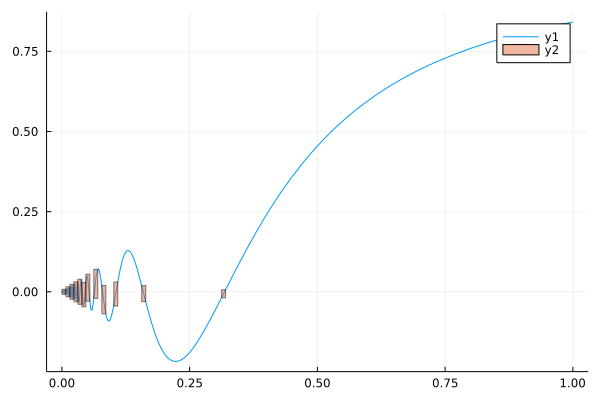

In [26]:
plot(f, 0, 1)
plot!(IntervalBox.(Xzeros, f.(Xzeros)))

Refining the intervals this gives us a way to identify small intervals that may contain zero; please note that this does not guarantee they contain zero, I will show some methods how to find zeros in a moment.

In [27]:
N = 512
X = [@interval i/N (i+1)/N for i in 0:N-1]
Xzeros = exclude_not_contain_zero(f, X)

25-element Vector{Interval}:
 [0, 0.00195313]
    [0.00195312, 0.00390625]
    [0.00390625, 0.00585938]
    [0.00585937, 0.0078125]
    [0.0078125, 0.00976563]
    [0.00976562, 0.0117188]
    [0.0117187, 0.0136719]
    [0.0136718, 0.015625]
    [0.015625, 0.0175782]
    [0.0175781, 0.0195313]
    [0.0195312, 0.0214844]
    [0.0214843, 0.0234375]
    [0.0234375, 0.0253907]
    [0.0253906, 0.0273438]
    [0.0273437, 0.0292969]
    [0.03125, 0.0332032]
    [0.0351562, 0.0371094]
    [0.0390625, 0.0410157]
    [0.0449218, 0.046875]
    [0.0527343, 0.0546875]
    [0.0625, 0.0644532]
    [0.078125, 0.0800782]
    [0.105468, 0.107422]
    [0.158203, 0.160157]
    [0.316406, 0.31836]

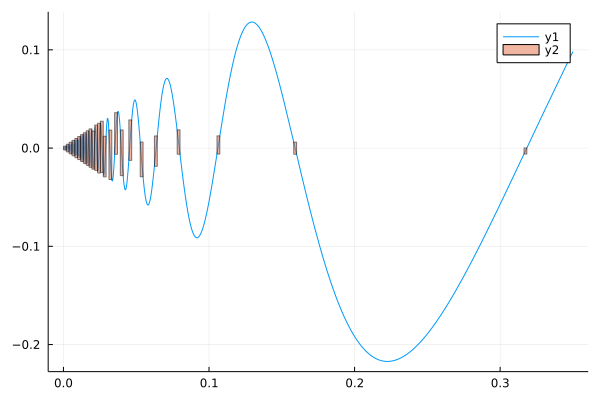

In [28]:
plot(f, 0, 0.35)
plot!(IntervalBox.(Xzeros, f.(Xzeros)))

While this may seem nothing extreme, please remark that this can be used to prove that a function is nonzero in a given interval. This can be used to exclude parameters.

## The interval Newton method

I will introduce now the workhorse of Validated Numerics, the interval Newton method.
To do so, we remember the [mean value theorem](https://en.wikipedia.org/wiki/Mean_value_theorem):
if $f$ is a continuous function on $[a, b]$ and differentiable on $(a,b)$ then there exists a point
$c$ in $(a,b)$ such that
$$
f(b)-f(a) = f'(c)(b-a).
$$

We want now to find a solution to the equation 
$$
f(x) = 0.
$$

By the mean value theorem, if $\tilde{x}$ is a solution of the equation and $x$ is another, nearby point, we have
$$
f(x) = f'(c)(x-\tilde{x}),
$$
and, if $f'(c)\neq 0$, this implies that
$$
\tilde{x} = x-\frac{f(x)}{f'(c)};
$$
this is the motivation behind the Newton iteration method, i.e., building the sequence
$$
x_{n+1} = x_{n}-\frac{f(x_n)}{f'(x_n)}.
$$
Please remark that under some conditions, this method converges to a root, but we do not know which root (there may be more than one) nor we can bound the distance between $x_{n}$ and $\tilde{x}$.
__Important__ please remark that if we knew the point $c$, we could compute exactly the root in one step. But the mean value theorem is a result of existence, it does not tell us which point is the point $c$.

The interval Newton method answers all these issues:
1. it proves whether an interval contains a root or not
2. it returns us an interval guaranteed to contain a root (this has the strength of a mathematical proof)
3. it can prove the fact that the root inside the interval is unique.

The idea is similar to the one used to build the Newton iteration. Suppose we are looking for a root of a function in the interval $I$; then, if $m$ is the midpoint of the interval and $\tilde{x}$ is the root, we have
that
$$
\tilde{x} = m-\frac{f(m)}{f'(c)}
$$
where $c$ is a point in the interval $I$. Now, interval arithmetics allows us to compute an interval that contains $f'(I)$, which in turn contains $f'(c)$.
So, given an interval $I$ we can compute a new interval
$$
N(f, I) = m-\frac{f(m)}{f'(I)}.
$$

In Tucker book it is proved that  :
- if $I$ contains a root, then $N(f, I)$ contains a root.
- if $N(f,I)\cap I$ is empty, we know that the interval contains no root. If it is not empty we know it contains at least a root.
- If $N(f, I)$ is strictly contained in $I$ the root is unique.

So, we have now a tool that allows us to rigorously enclose the roots of a function.

In [30]:
Newton(f, fprime, I::Interval{T}) where {T} = intersect(Interval{T}(mid(I))-f(Interval{T}(mid(I)))/fprime(I), I)

Newton (generic function with 1 method)

In [31]:
x = Newton(sin, cos, @interval 3 4)

[3, 3.14922]

As you can see, the result of the Newton interval step is telling us that the function $\sin$ has a unique $0$ in $[3, 4]$ and giving us a tighter interval that contains this $0$.
We can iterate this process.

In [32]:
for i in 1:10
    x = Newton(sin, cos, x)
end
println(x)
println(diam(x))

[3.14159, 3.1416]
4.440892098500626e-16


So, we have computed an interval that contains $\pi$, which is the $0$ of the function $\sin$ in $[3, 4]$, the interval has a diameter of $4.45\cdot e-16$. Please remark again, that this has the strength of a mathematical theorem, i.e., the interval $x$ has been proved, with the aid of a computer, to contain the value of $\pi$.
If we want tighter bounds, we can use higher precision floating point arithmetics in our intervals.

In [33]:
setprecision(1024)

1024

In [34]:
x = Interval{BigFloat}(x) # we will refine the interval computed in Float64

[3.14159, 3.1416]₁₀₂₄

In [35]:
for i in 1:10
    x = Newton(sin, cos, x)
end
println(x)
println(diam(x))

[3.14159, 3.1416]₁₀₂₄
2.225073858507201383090232717332404064219215980462331830553327416887204434813918195854283159012511020564067339731035811005152434161553460108856012385377718821130777993532002330479610147442583636071921565046942503734208375250806650616658158948720491179968591639648500635908770118304874799780887753749949451580452e-308


Again, this is a theorem, we have that $\pi$ is bounded below by

In [36]:
x.lo

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724586997

and above by

In [37]:
x.hi

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458702

Using Automatic Differentiation, the code for the Newton method can be written in an even simpler way.

In [38]:
using DualNumbers

In [39]:
Newton(f, I) = Newton(f, x->(f(Dual(x, 1)).epsilon), I)

Newton (generic function with 2 methods)

We can use this to certify the intervals that may contain the the zeros of the function $f(x) = x \cdot sin(1/x)$.

In [40]:
new_x = [Newton(f, x) for x in Xzeros]

25-element Vector{Interval{Float64}}:
 [0, 0.00195313]
    [0.00195312, 0.00390625]
    [0.00390625, 0.00585938]
    [0.00585937, 0.0078125]
    [0.0078125, 0.00976563]
    [0.00976562, 0.0117188]
    [0.0117187, 0.0136719]
    [0.0136718, 0.015625]
    [0.015625, 0.0175782]
    [0.0175781, 0.0195313]
    [0.0195312, 0.0214844]
    [0.0214843, 0.0234375]
    [0.0234375, 0.0253907]
    [0.0253906, 0.0273438]
    [0.0273437, 0.0292969]
    [0.03125, 0.0318799]
    [0.0351562, 0.0354759]
    [0.0396595, 0.0398118]
    [0.0453143, 0.0455086]
    [0.0528781, 0.0531012]
    [0.0636509, 0.0636828]
    [0.0795542, 0.0796158]
    [0.106088, 0.106116]
    [0.159154, 0.159156]
    [0.318298, 0.318322]

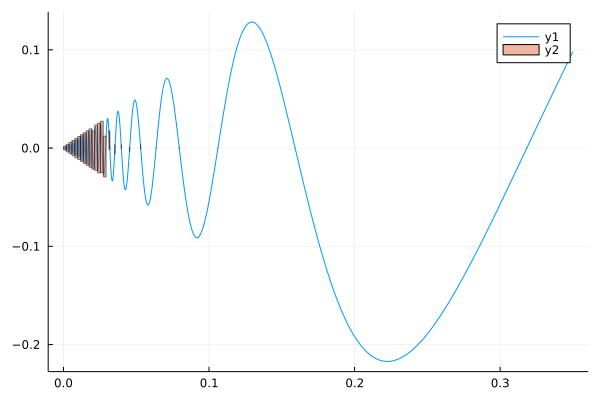

In [41]:
plot(f, 0, 0.35)
plot!(IntervalBox.(new_x, f.(new_x)))

The last two intervals are so thin that the plotting function is not rendering them exactly, but the Newton method confirmed them. What is striking is that the Newton method allowed us to prove the existence of at least one zero in each one of the intervals above.

We will zoom to $[0.3180, 0.3185]$.

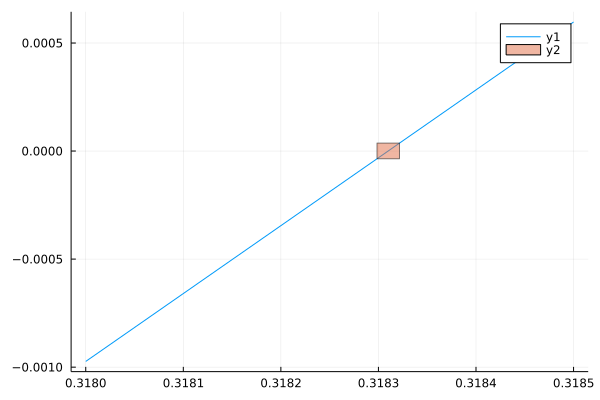

In [42]:
plot(f, 0.3180, 0.3185)
plot!(IntervalBox.(new_x[end], f.(new_x[end])))

__Exercise__: Modify the Interval Newton Method to solve the equation $f(x)=y$; can you implement it in such a way that $y$ may be an interval? What happens when you use to solve an equation $f(x)=y$ with $y$ a wide interval? 

## Taylor Models

I will introduce now another tool of Validated Numerics, used to get rigorous approximations of functions, called Taylor Models.

They are used in the rigorous computation of integrals and the rigorous computation of enclosures of trajectories of ODE. 

We want to be able to approximate a function by a polynomial with rigorous error bound.

In [43]:
import Pkg; Pkg.add("TaylorModels")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [44]:
using TaylorModels

In [45]:
f(x) = x*(x-1)*(x+2)*(x+3)^2*(x+7)*sin(2*π*x+0.5)
I =  @interval -0.5 0.5 # Domain

[-0.5, 0.5]

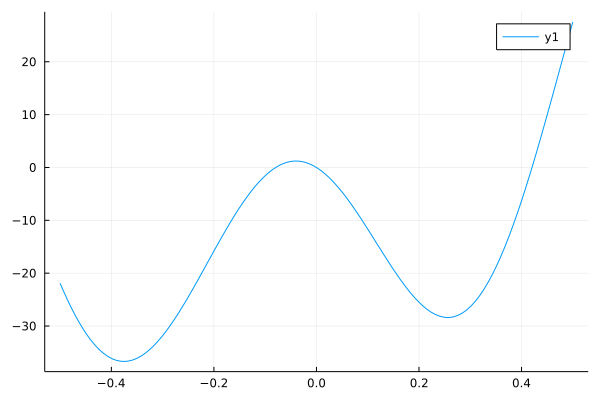

In [46]:
plot(f, -0.5, 0.5)

A Taylor model is a polynomial $P$ of degree $k$ and an interval $\Delta$ such that given a function $f$, on an interval $I$, $P$ is the Taylor polynomial of order $k$ at the center of the interval and $\Delta$ is an interval such that
$$
f(x)-P(x) \in \Delta
$$

In [47]:
TM10 = TaylorModel1(10, I); # Taylor model of order 10
TM15 = TaylorModel1(15, I); #Taylor model of order 15

In [48]:
TM10

 [1, 1] t + [0, 0]

In [49]:
TM15

 [1, 1] t + [0, 0]



Plese note that the Taylor model is centered at the midpoint of $I$.

In [50]:
?TaylorModel1

search: TaylorModel1 RTaylorModel1 TaylorModelN TaylorModels



```
TaylorModel1{T,S}
```

Absolute Taylor model in 1 variable, providing a rigurous polynomial approximation given by a Taylor polynomial `pol` (around `x0`) and an absolute remainder `rem` for a function `f(x)` in one variable, valid in the interval `dom`. This corresponds to definition 2.1.3 of Mioara Joldes' thesis.

Fields:

  * `pol`: polynomial approximation, represented as `TaylorSeries.Taylor1`
  * `rem`: the interval bound
  * `x0` : expansion point
  * `dom`: domain, interval over which the Taylor model is defined / valid

The approximation $f(x) = p(x) + \Delta$ is satisfied for all $x\in \mathcal{D}$ ($0\in \Delta$); `n` is the order (degree) of the polynomial $p(x)=\sum_{i=0}^n p_i (x - x_0)^i$.


In [52]:
FM10 = f(TM10)

 [-60.4077, -60.4076] t + [-713.464, -713.463] t² + [1019.54, 1019.55] t³ + [5455.4, 5455.41] t⁴ + [-2992.1, -2992.09] t⁵ + [-13939.6, -13939.5] t⁶ + [2732.61, 2732.62] t⁷ + [17794.6, 17794.7] t⁸ + [220.443, 220.444] t⁹ + [-13207.3, -13207.2] t¹⁰ + [-1.50153, 2.61226]

So, on $[-0.5, 0.5]$ the error between the value of $f$ and the value of the Taylor Model is contained in the interval $[-1.50153, 2.61226]$

On the same interval the Taylor model of order $15$ is the following.

In [53]:
FM15 = f(TM15)

 [-60.4077, -60.4076] t + [-713.464, -713.463] t² + [1019.54, 1019.55] t³ + [5455.4, 5455.41] t⁴ + [-2992.1, -2992.09] t⁵ + [-13939.6, -13939.5] t⁶ + [2732.61, 2732.62] t⁷ + [17794.6, 17794.7] t⁸ + [220.443, 220.444] t⁹ + [-13207.3, -13207.2] t¹⁰ + [-1977, -1976.99] t¹¹ + [6218.62, 6218.63] t¹² + [1549.74, 1549.75] t¹³ + [-1975.77, -1975.76] t¹⁴ + [-655.496, -655.495] t¹⁵ + [-0.00183813, 0.00860188]

As expected, passing from a linear approximation With higher order, we get smaller $\Delta$.

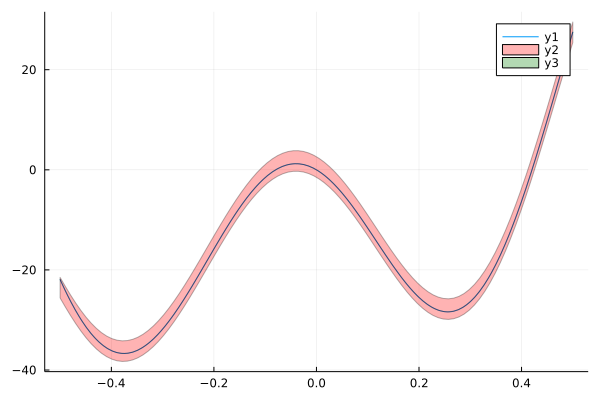

In [54]:
plot(f, -0.5, 0.5)
plot!(FM10, color=:red)
plot!(FM15, color = :green)

__Exercise__ : Find the Taylor models of order $5$, $10$ and $15$ of the function $f$ on the interval $[-0.125, 0.125]$. What happens to $\Delta$?

## Rigorous Integration

We are interested in computing rigorously the value of an integral. To do so, we will use Taylor Models.

In [55]:
f(x) = sin(exp(1/x))

f (generic function with 1 method)

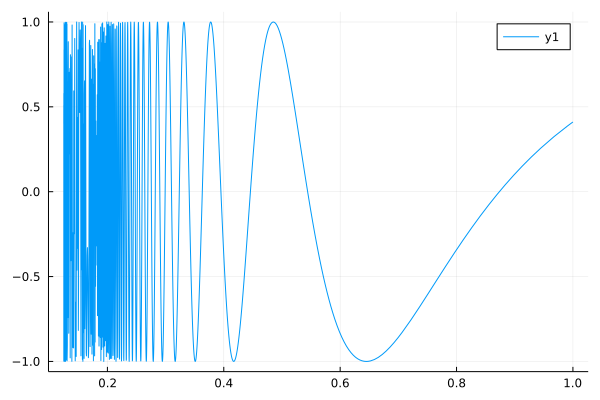

In [56]:
plot(f, 0.125, 1)

In this section I will show a tecnique to find intervals that enclose the true value of an integral. To show the power of the method I will compute the integral of an oscillating integral.

Having a Taylor expansion centered at the center of the interval allows us to easily compute the integral of the function over the integral.
Let $m$ be the midpoint of the interval, $r = x-m$ and $a_i$ the coefficients of $P$:
$$
\int_I f dx = \sum_{i=0}^n a_i \int_I (x-m)^i dx +\int_I f(x)-P(x) dx,
$$
so the integral is contained in the interval with center
$$
2\sum_{i=0}^{\lfloor n/2 \rfloor} a_{2i}\frac{r^{2i+1}}{2i+1} 
$$
and radius $\Delta\cdot |I|$ (where $|I|$ is the length of I). 

In [58]:
function integrate1(f, I; steps = 1024, degree = 6)
    lo = I.lo
    hi = I.hi
    l = diam(I)
    int_center = Interval(0.0)
    int_error = Interval(0.0)
    for i in 1:steps
        left = lo+(i-1)*(l/steps)
        right = lo+i*l/steps
        r = (1/2)*(l/steps)
        J = interval(left, right)
        TM = TaylorModel1(degree, J)
        FM = f(TM)
        #@info FM
        for i in 0:Int64(floor(degree/2))
            int_center+=2*(FM.pol[2*i]*r^(2*i+1))/(2*i+1)
            int_error +=2*FM.rem*r
        end
    end
    return int_center+int_error
end    

integrate1 (generic function with 1 method)

In [59]:
integrate1(f, @interval 0.25 1; steps = 1024, degree = 6)

[-0.124215, -0.124214]

This integral method can be made adaptive, both in the size of the interval $J$ and the degree of the Taylor expansion. This has the strength of a mathematical proof.

In [60]:
function adaptive_integration(f, I::Interval; tol = 2^-10, steps = 8, degree = 6) # tol 2^-10, steps = 8 are default values
    lo = I.lo
    hi = I.hi
    l = diam(I)
    int_value = Interval(0.0)
    for i in 1:steps
        left = lo+(i-1)*(l/steps)
        right = lo+i*l/steps
        Istep = Interval(left, right)
        val = integrate1(f, Istep)
        if radius(val)<tol
            int_value += val
        else
            I₁, I₂ = bisect(I)
            val₁ = adaptive_integration(f, I₁; tol = tol/2, steps = steps, degree = degree+2)
            val₂ = adaptive_integration(f, I₁; tol = tol/2, steps = steps, degree = degree+2)
            int_value +=val₁+val₂
        end
    end
    return int_value
end

adaptive_integration (generic function with 1 method)

In [61]:
@time adaptive_integration(f, @interval 0.125 1)

 57.924148 seconds (259.67 M allocations: 11.347 GiB, 6.95% gc time, 0.35% compilation time)


[-0.0175132, -0.0174087]

__Exercise__: Try to push the computation of the integral further near $0$.

# Summary of the lecture

In this lecture I introduced some tools that allow us to prove Theorems with the help of a computer.
1. Interval Arithmetic, that allows us to rigorously enclose the range of a function on an interval $I$
2. Interval Newton Method, that allows us to find an interval that is proved to contain the solution of the equation $f(x)=y$, allowing us to rigorously find inverse images
3. Taylor Models that allow us to approximate functions by polynomials with rigorous and explicit error bounds
4. Rigorous integration that allows us to compute rigorously the value of an integral over an Interval.

All these tools are the engine of our implementation of the Ulam method: we use the Interval Newton method to compute preimages, computing an Interval of entries which contains the entries of the true abstract matrix.

This is going to allow us to approximate the invariant density $h$ of the physical measure of a system.

Then are going to use rigorous integration to compute the Birkhoff averages of observables in a rigorous way, through the identity
$$
\lim_{n\to +\infty}\frac{1}{n}\sum_{i=0}^{n-1} \phi(T^i(x))=\int \phi h dx.
$$